In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# !ls "/content/drive/My Drive/"

In [4]:
!ls '/content/drive/My Drive/Colab Notebooks/Toxicity/'

 Deep_Learning_Toxicity.ipynb   test_labels.csv.zip
 sample_submission.csv.zip     'Toxic Comments - Notebook from Kaggle.ipynb'
 submission.csv		        train.csv.zip
 test.csv.zip


In [0]:
!cd '/content/drive/My Drive/Colab Notebooks/Toxicity/'

In [6]:
!ls

drive  sample_data


In [0]:
!cd "/content/drive/My Drive/Colab Notebooks/Toxicity"

In [8]:
!ls

drive  sample_data


In [0]:
# Checking our GPU use

In [10]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15556853380732141260, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2907425520844098194
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17105536528948452411
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7470045594
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12978884102998905030
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

In [12]:
!cat /proc/meminfo


MemTotal:       13335188 kB
MemFree:        10177504 kB
MemAvailable:   12213876 kB
Buffers:           75932 kB
Cached:          2100032 kB
SwapCached:            0 kB
Active:           879448 kB
Inactive:        1874852 kB
Active(anon):     531504 kB
Inactive(anon):     8520 kB
Active(file):     347944 kB
Inactive(file):  1866332 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              5492 kB
Writeback:             0 kB
AnonPages:        578288 kB
Mapped:           485168 kB
Shmem:              9092 kB
Slab:             166728 kB
SReclaimable:     126184 kB
SUnreclaim:        40544 kB
KernelStack:        4432 kB
PageTables:         7404 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667592 kB
Committed_AS:    3408204 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
df_train = pd.read_csv('drive/My Drive/Colab Notebooks/Toxicity/train.csv.zip', compression='zip')
df_test = pd.read_csv('drive/My Drive/Colab Notebooks/Toxicity/test.csv.zip', compression='zip')

In [15]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
import sklearn
import matplotlib
import matplotlib.pyplot as plt

# Exploration

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [18]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_train.drop(columns=['id', 'comment_text']).head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [0]:
df_train['sum'] = df_train.drop(columns=['id', 'comment_text']).sum(axis=1)

In [21]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [22]:
df_train['sum'].describe()

count    159571.000000
mean          0.219952
std           0.748260
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: sum, dtype: float64

In [0]:
df_train_small = df_train[:1000]

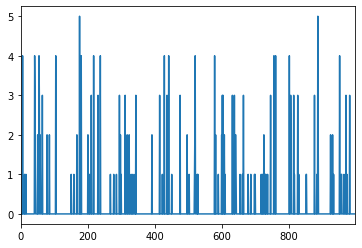

In [24]:
df_train_small['sum'].plot()

In [25]:
print(df_train[df_train['sum'] >= 2].count())
df_train[df_train['sum'] >= 2].head()

id               9865
comment_text     9865
toxic            9865
severe_toxic     9865
obscene          9865
threat           9865
insult           9865
identity_hate    9865
sum              9865
dtype: int64


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,4
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,3
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,2
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,4


The classes are not mutually exclusive

Hence, we will in fact be using multiple classifiers

* It appears that many toxic comments are all-caps, such a feature might be interesting to add

In [0]:
pd.set_option('display.max_colwidth', -1)


In [27]:
df_train['comment_text'][:10]

0    Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                         
1    D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)                                                                                                                                                                                                                                                           

In [28]:
df_train[:100]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
95,003b9f448ee4a29d,"""\n\nThanks. I can see that violating clearly stated Wikipedia policy is no problem with some people, as is now being reviewed elsewhere. Finishing up one other wiki project todsy and then spending the rest of the day on an important personal blog entry. Then I'll go find other discussions of James Petras' fascinating discussion of the use of the term """"Jewish Lobby"""" so that I don't have to put back up the deleted Dissident Voice article right away per Talk:Jewish_lobby#WP:V_-_comparing_Jewish_Virtual_Library_and_Dissident_Voice.\nCarol Moore talk""",0,0,0,0,0,0,0
96,003bd094feef5263,"""\nHi\nThanks for our kind words. See you around ) Talk """,0,0,0,0,0,0,0
97,003caacc6ce6c9e9,"Collusion in poker \n\nThis is regarded as most heinous form of cheating in poker, perhaps some mention of this (or example) is warranted?",0,0,0,0,0,0,0
98,003d77a20601cec1,"Thanks much - however, if it's been resolved, why is it that today, when I didn't write anything in edit summary, CAMERA put its ad in my edit summary box?1equalvoice1 (talk)",0,0,0,0,0,0,0


Are the different classes 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate' all included as 'toxic', as one would think?

In [29]:
print(df_train[(df_train['toxic'] != 1) & (df_train['severe_toxic']==1)])

Empty DataFrame
Columns: [id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate, sum]
Index: []


In [30]:
df_train[(df_train['toxic'] != 1) & (df_train['obscene']==1)].count()

id               523
comment_text     523
toxic            523
severe_toxic     523
obscene          523
threat           523
insult           523
identity_hate    523
sum              523
dtype: int64

In [31]:
df_train[(df_train['toxic'] != 1) & (df_train['threat']==1)].count()

id               29
comment_text     29
toxic            29
severe_toxic     29
obscene          29
threat           29
insult           29
identity_hate    29
sum              29
dtype: int64

In [32]:
df_train[(df_train['toxic'] != 1) & (df_train['insult']==1)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
179,006d11791d76b9f3,"REPLY ABOVE:\nThat was me, loser. The UN defines Vietnam to be part of Southeast Asia. And far as I know Vietnam is part of ASEAN, and used to be part of French Indochina with Laos and all those shit countries Anyway your culture has always been more influenced by SEA than Han Chinese (as in proper Yangtze Han Chinese, not the fringe indigenous tribes in Guangzhou/Guangxi). \n\nJust admit that you vietnamese are all a bunch of wannabe crap people. ALL the east asian people I've spoken to thinks of Vietnam as a very integral part of SEA, and we all think you're backward, dirty and speak in a horrible swearing language. Doesn't matter what crap you spout on Wikipedia, won't change the way people in the real world think.",0,0,0,0,1,0,1
662,01ccf4d20d31dfbe,"Hebrew Name of Lydia \nAppologies to Til Eulenspiegel I thought you were one of the idiots which your user page indicates you actually do well struggling against. \nGenesis 10:יג וּמִצְרַיִם יָלַד אֶת-לוּדִים וְאֶת-עֲנָמִים, וְאֶת-לְהָבִיםוְאֶת-נַפְתֻּחִים.TAB13 And Mizraim begot Ludim, and Anamim, and Lehabim, and Naphtuhim,\nYou see Ludim are from Mitzraim not to be confused with Lud son of Shem (in the far east).\nBest wishes and keep up the good work.81.103.121.144",0,0,0,0,1,0,1
1351,03aec26f9b6f9ba3,"""\n\n Stop. \n\nStop redirecting the Teddygodzilla page to List of Code Lyoko episodes. Clearly, I'm in the middle of working on it. What you need is patience, man. And don't give me something like """"YOU HAD ENOUGH TIME"""". How do you know I haven't been busy? What If I had to evacuate Hurricane Ike? As a matter of fact, My laptop charger decided to get fried, and I have a very small amount of time on a computer now. So my advice to you is to show some patience, or you will find me being a major asshole towards you. """,0,0,0,0,1,0,1
1624,045a7cdcbe340e8d,"You know what? Don't offend other users , you are a jerk! I know you are correct, but you don't have to get so angry about it. 207.62.246.166",0,0,0,0,1,0,1
1867,050c330758a40c44,"""=Reliable sources===\nCheating:\n""""Barry Bonds:Cheater"""" from CBS, yea I kinda think that is reliable. \n""""Dear Barry Bonds, You are either an outright cheater or very stupid"""" from the USA Today \n""""Yes, Barry Bonds is a cheater. He is a cheater of the worst sort"""" \nLying:\n""""It's clear, Barry Bonds' a liar"""" New York Daily News, another pretty freakin' reliable source. \n""""Barry Lamar Bonds is a bad man"""" Baseball Digest \n""""but Bonds is a liar, a cheater, a whiner and a bad influence on America's youth"""" Mark Barnes\n\n==""",0,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...
158327,ec31b11dade69af2,Check this out dumb Mexican:\nhttp://www.ripoffreport.com/reports/ripoff193659.htm,0,0,0,0,1,1,2
158354,ec886f96175822c6,"Its common sense dumbass, it was a fight in the WEC 67.163.17.113",0,0,1,0,1,0,2
158615,f0b46600c7cf2515,"""""""And at least Castro was trying to liberate Cuba from US domination and uplift the working-class"""" Oh, really? I thought he just wanted naked power, like every other asshole dictator on the planet. I guess you're right, though, he has in fact allowed numerous free elections since he took power. Moron. Alex7777\n\n""",0,0,1,0,1,0,2
158793,f3d62179cdb93e58,"Hey FayssalFag, will you ever get a life offline and do something constructive with your life or are you adamant on perpetuating the idiotic sham of a reference that wikishitia is? What good has this pathetic OCD reference done but miseducate millions of monkeys? Have you consider moving to Cali? They've legalized same-sex marriage, filthy queer.",0,0,1,0,1,0,2


In [33]:
df_train[(df_train['toxic'] != 1) & (df_train['identity_hate']==1)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
3620,09b51ed1ee5e29a1,"Mate, sound like you are jewish\n\nGayness is in the air",0,0,0,0,0,1,1
4468,0be7965b23078261,"""Just face the truth: you can't escape it!==\nUser:Arilang1234 didn't edit your foul, slimy racist template, you loser. I suggest that YOU stop pretending that Manchus are ethnically Chinese. How about YOU face the undeniable truth?\n\nAnd how about YOU stop making false accusations about other users? \n\nFollowing the blocking of the above user, I am very surprised that you haven't been blocked from editing Wikipedia as well given that your Manchu ethnicity template itself (as created by you) is also a blatant violation of Wikipedia policy. 96.9.180.213 \n\nBarnstar\n The Monkey's Barnstar For pushing forward fringe views on Wikipedia, especially your foul, slimy, racist view that Manchus are ethnically Chinese. You have proven yourself to be more barbaric than this monkey. Here's a banana.\n\nCongratulations for acting like a monkey!\nWow, so you have managed to earn The Monkey's Barnstar. You must be highly barbaric then. 209.162.35.64 \n\nStop making false accusations\nCongratulations for calling User 77.182.67.105 the """"h word"""". Well I have news for you: User 77.182.67.105 is not ethnically Chinese. So just face the truth and stop name-calling, you racist Manchu! Otherwise, I will get my meatpuppets to stop you in your tracks! \n\n==""",0,0,1,0,1,1,3
5839,0f9a7ba1acde6b6e,"it is obvius to, me, a black man, that orange is for da black Gs, blue is for mexicans and yellow is 4 whites. coz whites look like woman. and mexicans try to compete with da nigger Gs but we r too strong. but in realty the whites also lose to da black man coz we have foot longs124.176.226.45 \n\nOrange-throated males are strongest and do not form strong pair bonds; instead, they fight blue-throated males for their females. Yellow-throated males, however, manage to snatch females away from them for mating.\nBlue-throated males are middle-sized and form strong pair bonds. While they are outcompeted by orange-throated males, they can defend against yellow-throated ones.\nYellow-throated males are smallest, and their coloration mimics females. Under this disguise, they can approach orange-throated males (though not the stronger-bonding, blue-throated specimens) and mate while the orange-throats are engaged in fights.",0,0,0,0,0,1,1
7036,12c82a67010c0fcf,"""\n\nAn illness has nothing to do with time/era, but """"mental illnesses"""", for some reason, do. In a society where everyone is narcissistic, it's not a disorder. Ragheads think we're insane, and we think those sand-niggers are crazy too. Ever heard of """"Einstein's Theory of Relativity""""? I think not. """,0,0,0,0,1,1,2
8417,165fe8bb208c44d0,"Now.. For the picture page to remain, what do you need remove on the pages.\n\nTwo, can you remove the fraud external links, you make all Nigerian look like fraud or con artists....\nthis is my request.",0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...
149928,63c44599fce8f0c2,"Basically, homosexuality lowers productivity, which, through natrual law, would make it a disorder.",0,0,0,0,0,1,1
152432,8d5357b31c79fb9f,"False information? How about you go get your facts strIght moron ! Mousasi is an Armenian , Both parants are Armenian, That makes his Nationality Armenian ! just because he lives in Amsterdam that does not make his Natioanlity Dutch you idiot!",0,0,1,0,1,1,3
154391,ad4079b703b3d6a8,"""Behinderte Russen: Meaning """"Retarded Russians"""", most commonly used in Switzerland. Derived from the stereotype that Ukrainians are similar to Russians, but mentally retarded and facially similar to those afflicted with Down's Syndrome.\n\n""",0,0,1,0,1,1,3
154533,af479dae8f48eb56,"The Jews who keep trolling this article are merely trying to cause a problem. If they weren't then why are they always together, Jewish and all on topics even just slightly related to Je

# Quick & easy Neural Network Practice

Based on the following Notebook

https://www.kaggle.com/sbongo/for-beginners-tackling-toxic-using-keras

## Imports

In [34]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


 ## Word Embeddings with Vocabulary

Let's use word embeddings on a vocabulary (ie not using word2vec or similar methods)

In [35]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,0


In [0]:
list_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [0]:
y = df_train[list_classes].values

In [38]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [0]:
list_sentences_train = df_train['comment_text']
list_sentences_test = df_test['comment_text']

In [40]:
type(list_sentences_train)

pandas.core.series.Series

### Preprocessing our words into vectors

In [0]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))

In [0]:
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)

In [0]:
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [0]:
# tokenizer.word_counts
# tokenizer.word_docs
# tokenizer.document_count
# tokenizer.word_index

In [45]:
list_tokenized_train[:5]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985],
 [52,
  2635,
  13,
  555,
  3809,
  73,
  4556,
  2706,
  21,
  94,
  38,
  803,
  2679,
  992,
  589,
  8377,
  182],
 [412,
  437,
  73,
  134,
  14,
  249,
  2,
  71,
  314,
  78,
  50,
  9,
  13,
  626,
  8,
  2284,
  492,
  502,
  102,
  4,
  611,
  2,
  35,
  325,
  126,
  363,
  3,
  29,
  38,
  27,
  52,
  208,
  2,
  434,
  57,
  36,
  1,
  2394,
  93,
  1,
  737,
  468],
 [57,
  7,
  228,
  97,
  54,
  328,
  1436,
  15,
  2133,
  7,
  6024,
  22,
  1,
  123,
  2502,
  56,
  16,
  513,
  15,
  25,
  5,
  4236,
  3,
  1327,
  3,
  9762,
  7,
  67,
  1,
  277,
  85,
  122,
  13503,
  37,
  9,
  51,
  19,
  42,
  10,
  1,
  1460,
  138,
  1257,
  2153,
  426,
 

In [0]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

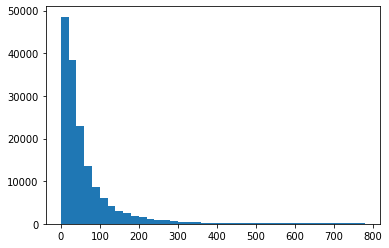

In [47]:
plt.hist(totalNumWords, bins=np.arange(0,800,20))
plt.show()

Thus, let's use maxlen = 200 for the maximum number of words in a commment

In [0]:
maxlen = 200

In [0]:
X_train = pad_sequences(list_tokenized_train, maxlen = maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen = maxlen)

## Building our Neural Net architecture

![Our NN Architecture](https://i.imgur.com/txJomEa.png)

In [50]:
X_train.shape

(159571, 200)

In [51]:
input = keras.layers.Input(shape=(maxlen, ))

Embedding Layer is a projection for dimension reduction

In [52]:
embed_size = 128
x = keras.layers.Embedding(max_features, embed_size)(input)

In [53]:
# Use CuDNNLSTM instead of LSTM to make use of GPU acceleration
x = keras.layers.CuDNNLSTM(60, return_sequences=True, name='lstm_layer')(x)

x = keras.layers.GlobalMaxPool1D()(x)

x = keras.layers.Dropout(0.1)(x)

x = keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal')(x)

x = keras.layers.Dropout(0.1)(x)

x = keras.layers.Dense(6, activation='sigmoid', kernel_initializer='he_normal')(x)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model = keras.models.Model(inputs=[input], outputs = [x])

In [55]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (CuDNNLSTM)       (None, 200, 60)           45600     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0   

### Train

In [57]:
batch_size = 32
epochs = 2
history = model.fit(X_train, y,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_split=0.1)




Train on 143613 samples, validate on 15958 samples
Epoch 1/2





143613/143613 [==============================] - 86s 597us/step - loss: 0.0704 - acc: 0.9774 - val_loss: 0.0485 - val_acc: 0.9820
Epoch 2/2
143613/143613 [==============================] - 71s 495us/step - loss: 0.0448 - acc: 0.9834 - val_loss: 0.0469 - val_acc: 0.9827


Our score with a last layer of tanh is much worse (~0.6) than when using the classic sigmoid function

Let's use the sigmoid function then

In [58]:
batch_size = 128
epochs = 2
history = model.fit(X_train, y,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 22s 155us/step - loss: 0.0380 - acc: 0.9852 - val_loss: 0.0469 - val_acc: 0.9827
Epoch 2/2
143613/143613 [==============================] - 22s 155us/step - loss: 0.0345 - acc: 0.9864 - val_loss: 0.0483 - val_acc: 0.9823


Let's train the model for a few more epochs

Thus, we will need to save our model regularly in case it crashes

In [0]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_lstm_model.h5', 
                                                save_best_only=True)

In [60]:
batch_size = 128
epochs = 10
history = model.fit(X_train, y,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_split=0.1,
                    callbacks = [checkpoint_cb])

Train on 143613 samples, validate on 15958 samples
Epoch 1/10
143613/143613 [==============================] - 22s 155us/step - loss: 0.0310 - acc: 0.9876 - val_loss: 0.0501 - val_acc: 0.9825
Epoch 2/10
143613/143613 [==============================] - 22s 156us/step - loss: 0.0279 - acc: 0.9887 - val_loss: 0.0536 - val_acc: 0.9819
Epoch 3/10
143613/143613 [==============================] - 22s 155us/step - loss: 0.0249 - acc: 0.9901 - val_loss: 0.0569 - val_acc: 0.9818
Epoch 4/10
143613/143613 [==============================] - 22s 155us/step - loss: 0.0222 - acc: 0.9912 - val_loss: 0.0621 - val_acc: 0.9816
Epoch 5/10
143613/143613 [==============================] - 22s 155us/step - loss: 0.0197 - acc: 0.9922 - val_loss: 0.0668 - val_acc: 0.9813
Epoch 6/10
143613/143613 [==============================] - 22s 156us/step - loss: 0.0175 - acc: 0.9931 - val_loss: 0.0774 - val_acc: 0.9811
Epoch 7/10
143613/143613 [==============================] - 22s 156us/step - loss: 0.0157 - acc: 0.9939

In [0]:
y_pred_test = model.predict(X_test)

In [62]:
y_pred_test[:5]

array([[9.9998498e-01, 5.7621825e-01, 9.9928564e-01, 7.5796783e-02,
        9.9174917e-01, 1.1288825e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1920929e-07, 0.0000000e+00, 5.9604645e-08, 2.0861626e-07,
        6.2584877e-07, 5.0663948e-07],
       [1.3113022e-06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0861626e-07, 0.0000000e+00],
       [1.4901161e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [63]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [64]:
y_pred_test.shape

(153164, 6)

In [65]:
df_test.shape

(153164, 2)

## Prediction Results

Let's create our result DataFrame, by concatenating:
* The first column of df_test
* The DataFrame version of our np.array

In [0]:
df_pred_1 = df_test[['id']]

In [67]:
df_pred_1.head()

,id
0,00001cee341fdb12
1,0000247867823ef7
2,00013b17ad220c46
3,00017563c3f7919a
4,00017695ad8997eb


In [0]:
list_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [0]:
df_pred_2 = pd.DataFrame(y_pred_test, columns=list_classes)

In [70]:
df_pred_1.head()

,id
0,00001cee341fdb12
1,0000247867823ef7
2,00013b17ad220c46
3,00017563c3f7919a
4,00017695ad8997eb


In [71]:
df_pred_2.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,9.999850e-01,0.576218,9.992856e-01,7.579678e-02,9.917492e-01,1.128882e-01
1,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.192093e-07,0.000000,5.960464e-08,2.086163e-07,6.258488e-07,5.066395e-07
3,1.311302e-06,0.000000,0.000000e+00,0.000000e+00,2.086163e-07,0.000000e+00
4,1.490116e-07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [0]:
df_pred = pd.concat([df_pred_1, df_pred_2], axis=1)

In [73]:
df_pred.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,9.999850e-01,0.576218,9.992856e-01,7.579678e-02,9.917492e-01,1.128882e-01
1,0000247867823ef7,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,00013b17ad220c46,1.192093e-07,0.000000,5.960464e-08,2.086163e-07,6.258488e-07,5.066395e-07
3,00017563c3f7919a,1.311302e-06,0.000000,0.000000e+00,0.000000e+00,2.086163e-07,0.000000e+00
4,00017695ad8997eb,1.490116e-07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [74]:
df_pred.shape

(153164, 7)

In [0]:
df_pred.to_csv('submission.csv', index=False, header=True)

In [76]:
import os
print( os.getcwd() )
print( os.listdir() )

/content
['.config', 'my_lstm_model.h5', 'submission.csv', 'drive', 'sample_data']


In [0]:
from google.colab import files
files.download( "submission.csv" )  

Testing more-epochs network

In [79]:
batch_size = 128
epochs = 40
history = model.fit(X_train, y,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_split=0.1,
                    callbacks = [checkpoint_cb])

Train on 143613 samples, validate on 15958 samples
Epoch 1/40
143613/143613 [==============================] - 22s 156us/step - loss: 0.0107 - acc: 0.9959 - val_loss: 0.0950 - val_acc: 0.9801
Epoch 2/40
143613/143613 [==============================] - 22s 156us/step - loss: 0.0097 - acc: 0.9963 - val_loss: 0.1031 - val_acc: 0.9806
Epoch 3/40
143613/143613 [==============================] - 22s 156us/step - loss: 0.0090 - acc: 0.9966 - val_loss: 0.1089 - val_acc: 0.9797
Epoch 4/40
143613/143613 [==============================] - 22s 156us/step - loss: 0.0084 - acc: 0.9968 - val_loss: 0.1084 - val_acc: 0.9791
Epoch 5/40
143613/143613 [==============================] - 22s 156us/step - loss: 0.0079 - acc: 0.9969 - val_loss: 0.1196 - val_acc: 0.9794
Epoch 6/40
143613/143613 [==============================] - 22s 156us/step - loss: 0.0075 - acc: 0.9972 - val_loss: 0.1216 - val_acc: 0.9793
Epoch 7/40
143613/143613 [==============================] - 22s 156us/step - loss: 0.0068 - acc: 0.9974